In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


In [62]:
df = pd.read_csv("Groceries_dataset.csv")

In [63]:
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [64]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Handles DD-MM-YYYY format
df = df.sort_values(by=['Member_number', 'Date'])  # Sort by member and date

In [65]:
transactions = df.groupby('Member_number')['itemDescription'].agg(list).reset_index()
transactions.rename(columns={'itemDescription': 'Items'}, inplace=True)
transactions

,Member_number,Items
0,1000,"[whole milk, pastry, salty snack, sausage, who..."
1,1001,"[sausage, whole milk, rolls/buns, whole milk, ..."
2,1002,"[frozen vegetables, other vegetables, butter, ..."
3,1003,"[frozen meals, dental care, rolls/buns, rolls/..."
4,1004,"[pip fruit, whole milk, tropical fruit, dish c..."
...,...,...
3893,4996,"[salty snack, tropical fruit, dessert, bottled..."
3894,4997,"[whole milk, canned beer, tropical fruit, whit..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[semi-finished bread, newspapers, other vegeta..."


In [66]:
item_counts = df['itemDescription'].value_counts()
print(item_counts)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64


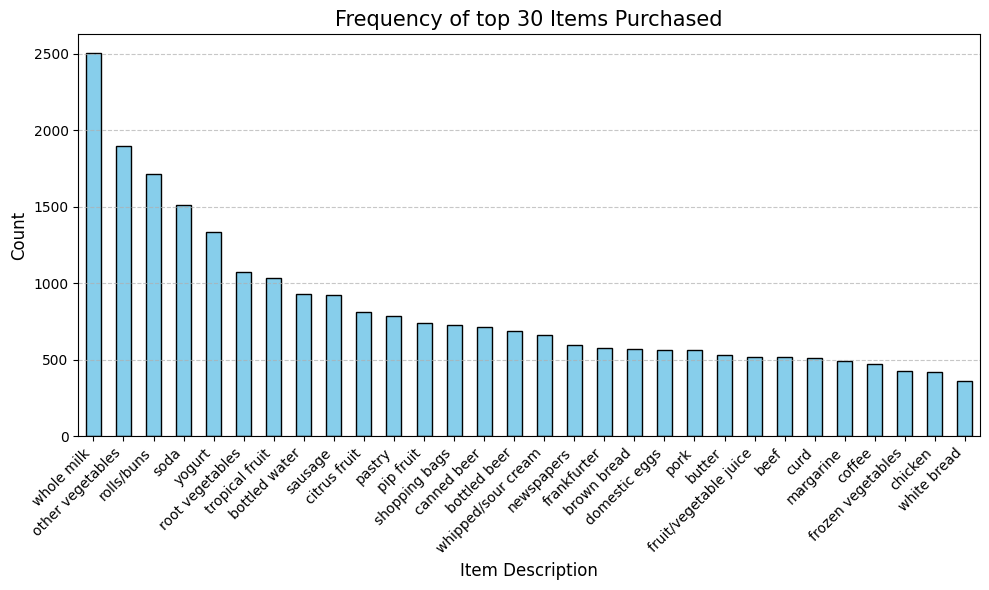

In [67]:
plt.figure(figsize=(10, 6))
item_counts.head(30).plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of top 30 Items Purchased', fontsize=15)
plt.xlabel('Item Description', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

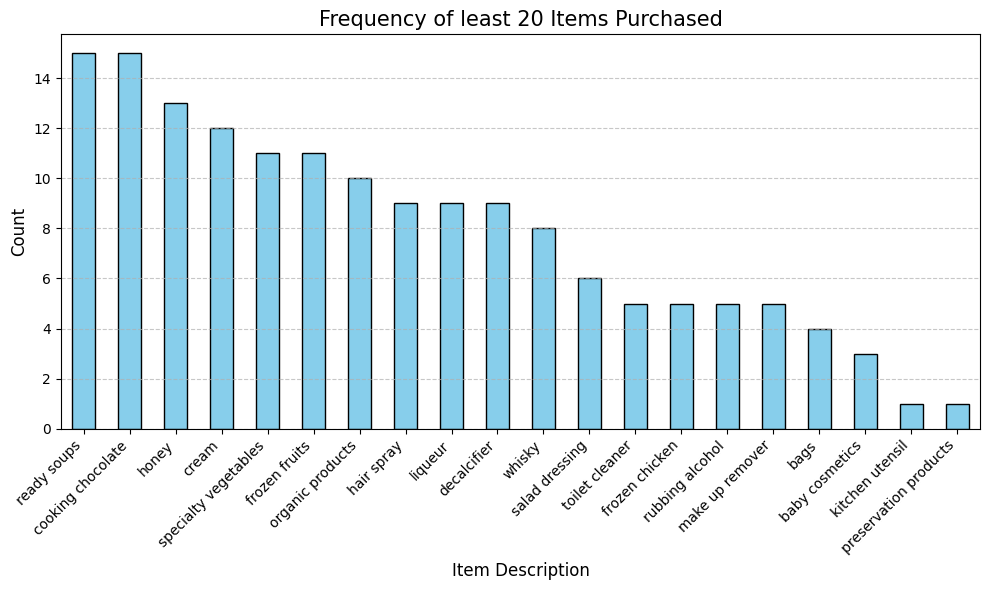

In [68]:
plt.figure(figsize=(10, 6))
item_counts.tail(20).plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of least 20 Items Purchased', fontsize=15)
plt.xlabel('Item Description', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [69]:
transactions = transactions['Items'].tolist()

In [73]:
# One-hot encode
te = TransactionEncoder()
df_encoded = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Run FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)
# print(frequent_itemsets)

# Optional: Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

           antecedents         consequents  antecedent support  \
0               (soda)        (whole milk)            0.313494   
1         (whole milk)              (soda)            0.458184   
2         (rolls/buns)              (soda)            0.349666   
3               (soda)        (rolls/buns)            0.313494   
4   (other vegetables)              (soda)            0.376603   
5               (soda)  (other vegetables)            0.313494   
6         (whole milk)            (yogurt)            0.458184   
7             (yogurt)        (whole milk)            0.282966   
8   (other vegetables)            (yogurt)            0.376603   
9             (yogurt)  (other vegetables)            0.282966   
10        (rolls/buns)            (yogurt)            0.349666   
11            (yogurt)        (rolls/buns)            0.282966   
12           (sausage)        (whole milk)            0.206003   
13        (whole milk)           (sausage)            0.458184   
14        

In [74]:
def recommend_items(rules, current_items, top_n=3):

    # Filter rules where antecedents match the user's items
    matched_rules = rules[
        rules['antecedents'].apply(lambda x: set(current_items).issuperset(x))
    ]
    
    # Sort by confidence (or lift, support) and get top_n consequents
    matched_rules = matched_rules.sort_values('confidence', ascending=False)
    recommendations = set()
    
    for _, rule in matched_rules.head(top_n).iterrows():
        recommendations.update(rule['consequents'])
    
    return list(recommendations)

In [82]:
recommend_items(rules, ['soda'], top_n=3)

['other vegetables', 'whole milk', 'rolls/buns']